#  Exploratory Data Analysis (EDA) 

## Uncovering Insights in Titanic Data

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Data Loading and Initial Exploration
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Step 2: Data Cleaning and Handling Missing Values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


The following columns can be dropped from the Titanic dataset:

"PassengerId": A unique identifier for each passenger, which does not contribute to predicting survival.

"Name": Individual names are unlikely to have a direct impact on survival predictions.

"Ticket": Ticket numbers are not likely to provide meaningful insights for survival.

"Cabin": Contains a large number of missing values and lacks specific information relevant to survival.

In [5]:
drop_list = ["Ticket","Cabin","PassengerId","Name"]
df.drop(columns=drop_list, inplace=True)

In [6]:
# Step 3: Descriptive Statistics
summary_stats = df.describe()
print(summary_stats)

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Survival Rate (Survived): The average survival rate is approximately 38%, indicating that about 38% of the passengers survived.

Passenger Class (Pclass):The average passenger class is around 2.31, which means that the majority of passengers were in second class or third class.

Age Distribution (Age):The average age of passengers is about 29.70 years.
The age distribution has a standard deviation of approximately 14.53, indicating a relatively wide spread of ages.
The minimum age is 0.42 years (around 5 months), suggesting that there were infants on board.
The maximum age is 80 years, indicating that there were elderly passengers as well.

Siblings/Spouses Aboard (SibSp) and Parents/Children Aboard (Parch):
The maximum values for SibSp and Parch are 8 and 6, respectively, suggesting the presence of larger families.

Fare Distribution (Fare): The average fare paid by passengers is around $32.20.
The fare distribution has a relatively high standard deviation of approximately $49.69, indicating a wide range of fares.
The minimum fare is $0.00, which could indicate free tickets or missing values.
The maximum fare is $512.33, suggesting that some passengers paid significantly higher fares.

In [7]:
#Number of unique values for each column
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(column,"--->",num_unique_values)

Survived ---> 2
Pclass ---> 3
Sex ---> 2
Age ---> 88
SibSp ---> 7
Parch ---> 7
Fare ---> 248
Embarked ---> 3


In [8]:
# Step 4: Data Visualization
sns.set(style="whitegrid")

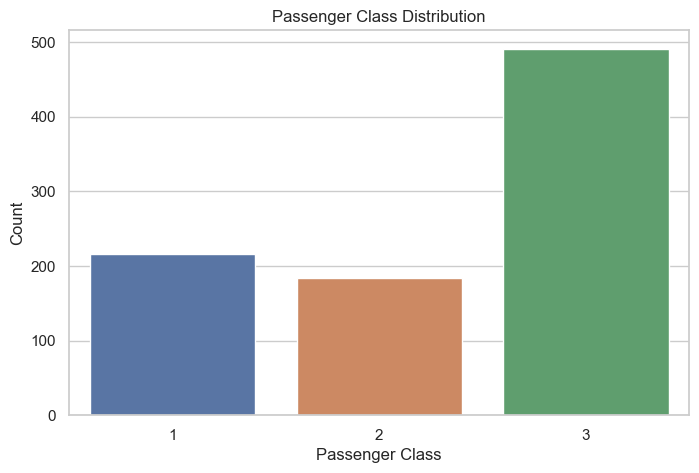

In [9]:
# Passenger Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Pclass", data=df)
plt.title("Passenger Class Distribution")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


The countplot reveals that a significant majority of individuals belonged to the third passenger class.

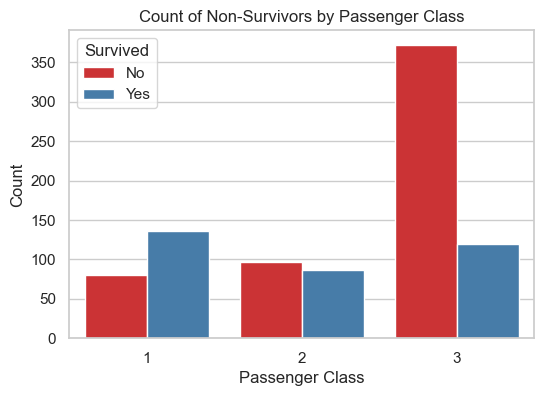

In [10]:
# Survival Rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Count of Non-Survivors by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The countplot reveals that the largest proportion of individuals who did not survive were from the third passenger class.

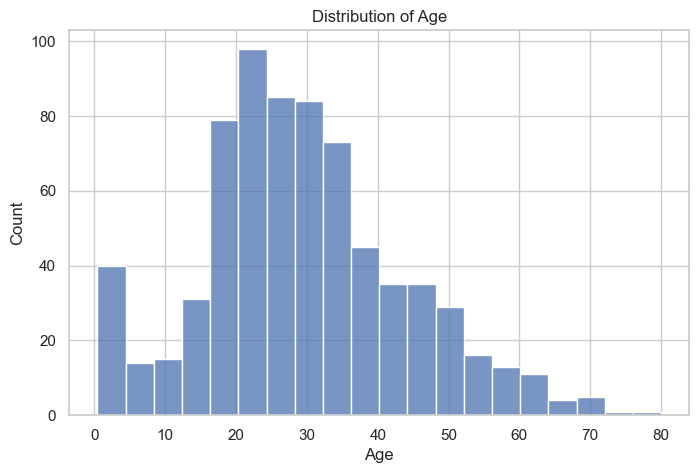

In [11]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"].dropna(), bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The histogram indicates that the distribution of ages follows an 
approximately normal distribution.

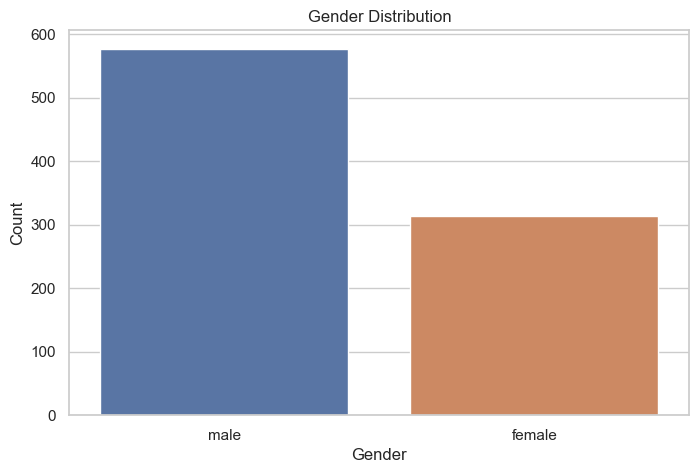

In [12]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

The visualization indicates that there was a higher number of male passengers compared to female passengers.

<Figure size 800x500 with 0 Axes>

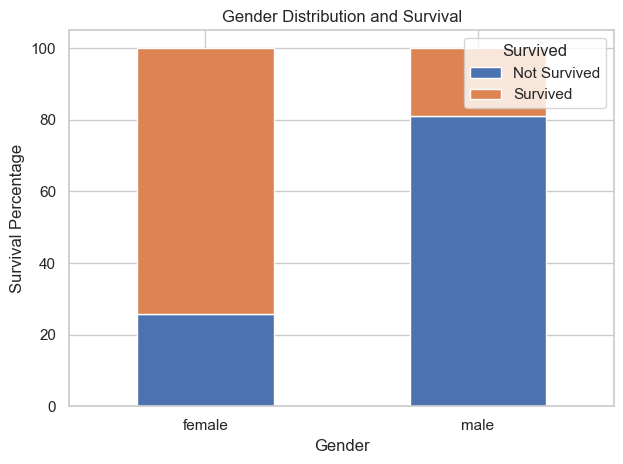

In [13]:
# Gender Distribution and Survival Analysis
plt.figure(figsize=(8, 5))
gender_survival = df.groupby(["Sex", "Survived"]).size().unstack()
gender_survival_percentage = gender_survival.div(gender_survival.sum(axis=1), axis=0) * 100

ax = gender_survival_percentage.plot(kind="bar", stacked=True)
plt.title("Gender Distribution and Survival")
plt.xlabel("Gender")
plt.ylabel("Survival Percentage")
plt.xticks(rotation=0)
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.tight_layout()
plt.show();

Based on the stacked bar plot, it's evident that a significant portion of male passengers did not survive the disaster.

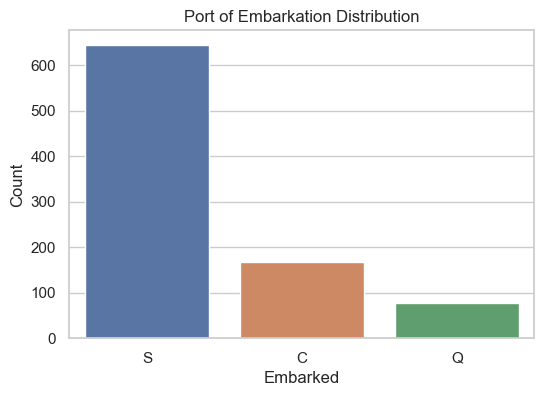

In [14]:
#Port of Embarkation Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Port of Embarkation Distribution')
plt.show()

The visualization reveals that the majority of passengers boarded from the port of embarkation - S.

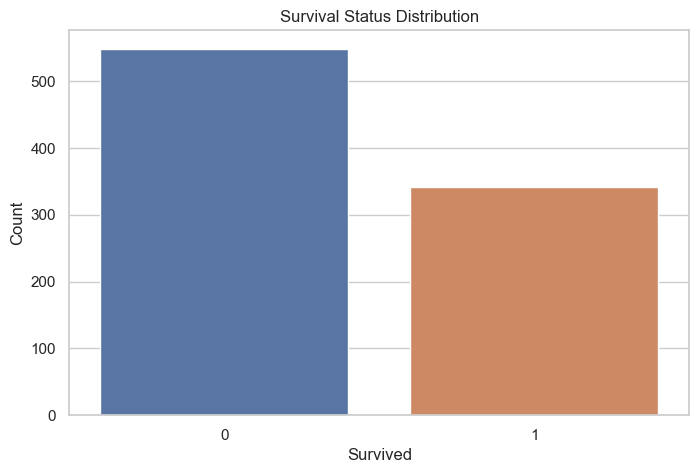

In [15]:
# Survival Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Survived", data=df)
plt.title("Survival Status Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

Roughly 62% of passengers did not survive the disaster.

/var/folders/zp/hlds8m997jl7vy4l10k7qd2w0000gn/T/ipykernel_1426/3718478990.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop("Survived", axis=1).corr()


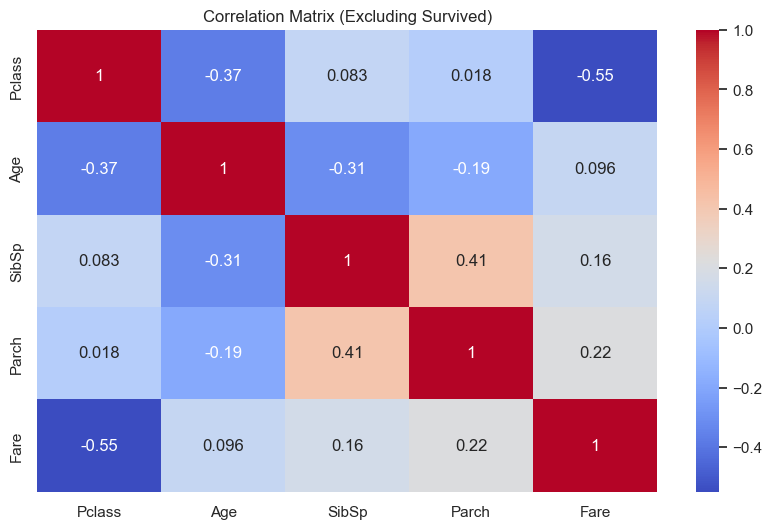

In [16]:
# Step 5: Correlation Analysis

# Calculate Correlation Matrix (excluding "Survived" column)
correlation_matrix = df.drop("Survived", axis=1).corr()
# Create a Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Excluding Survived)")
plt.show()

The correlation matrix reveals that there are no strong correlations between the features.

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


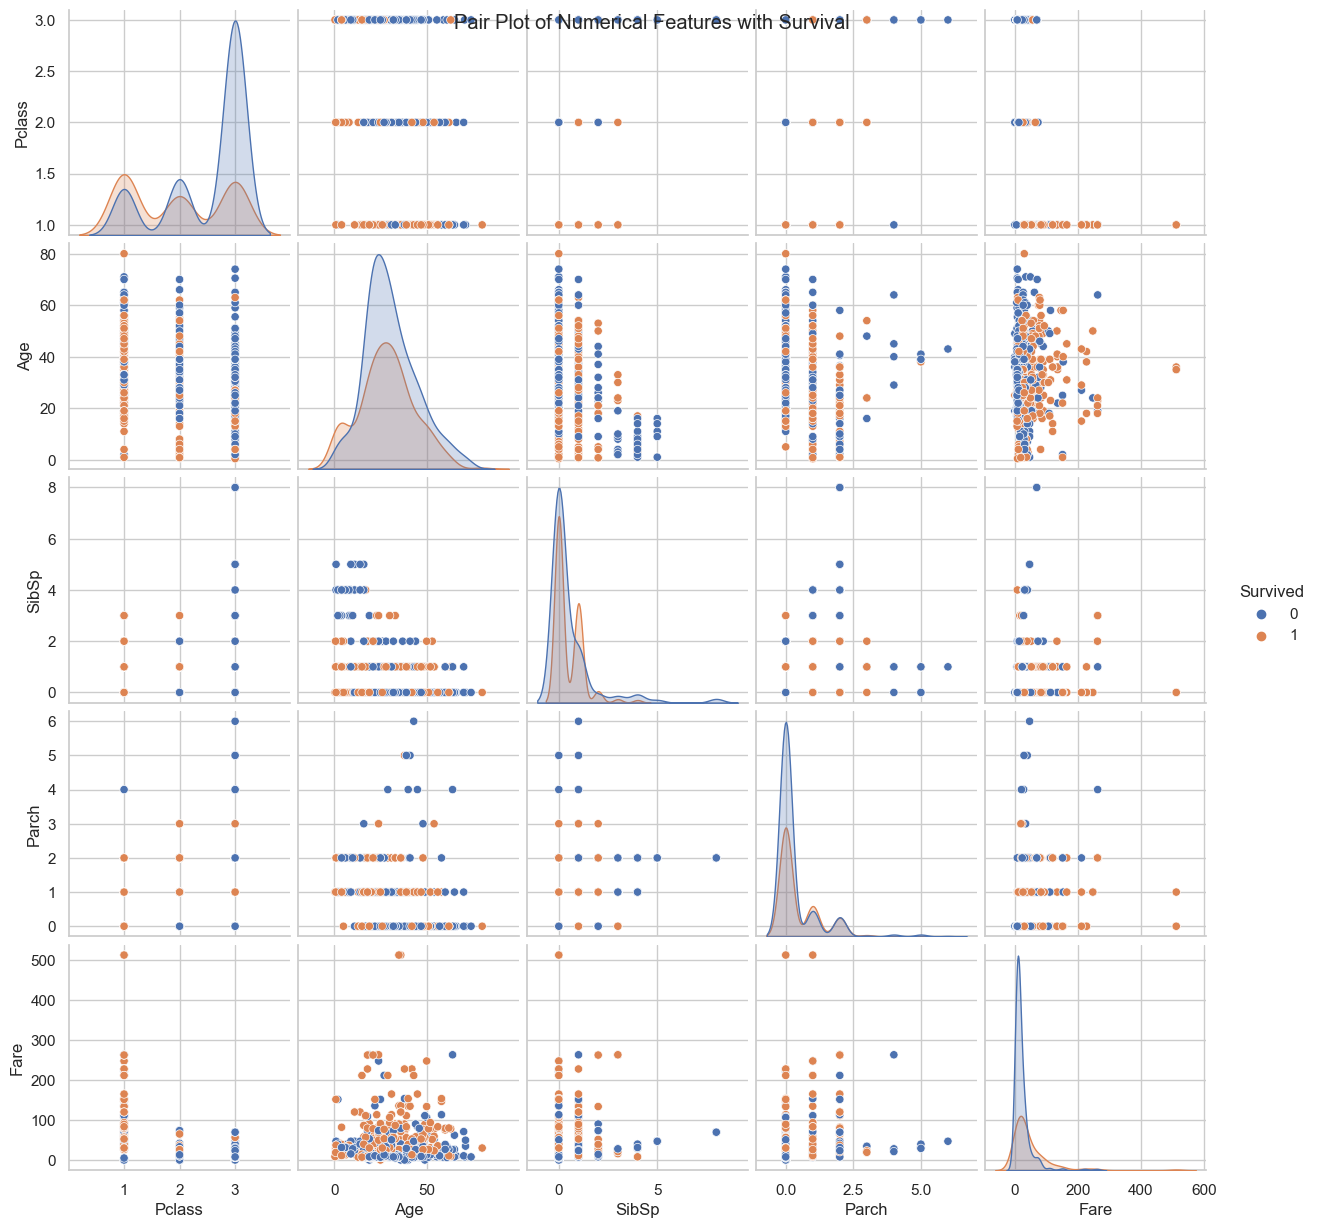

In [17]:
# Pair Plot of Numerical Features with Survival
sns.pairplot(df, hue='Survived')
plt.suptitle('Pair Plot of Numerical Features with Survival')
plt.show()

In [18]:
# Step 6: Cross-Tabulation and Pivot Tables
cross_tab = pd.crosstab(df["Pclass"], df["Survived"])
print(cross_tab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


* A higher proportion of passengers in Pclass 1 survived compared to those who did not.
* In Pclass 2, the number of survivors is relatively close to the number of non-survivors.
* In Pclass 3, the number of non-survivors is noticeably higher than the number of survivors.

In [19]:
pivot_table = df.pivot_table(index="Pclass", columns="Sex", values="Survived", aggfunc="mean")
print(pivot_table)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


* Female passengers in all passenger classes had higher survival rates compared to male passengers.
* The survival rates for female passengers were particularly high in first and second class.
* Survival rates for male passengers were notably lower across all passenger classes.

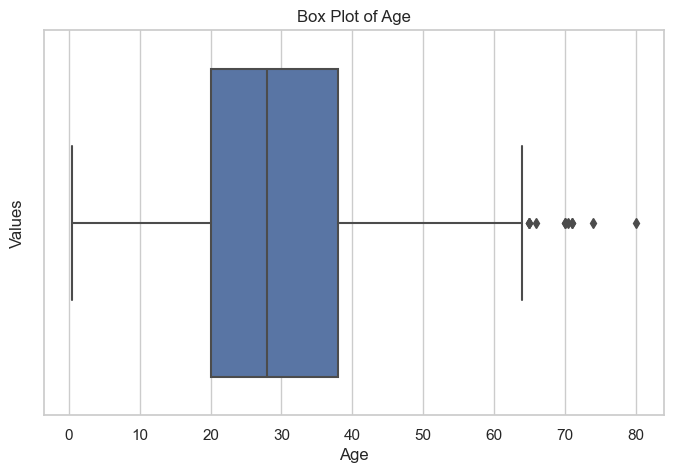

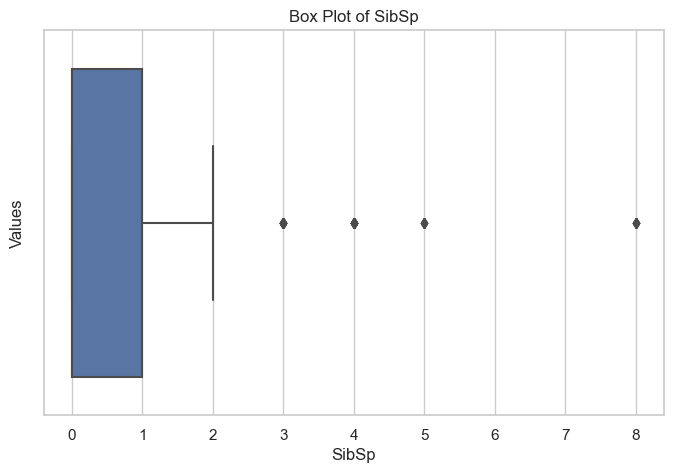

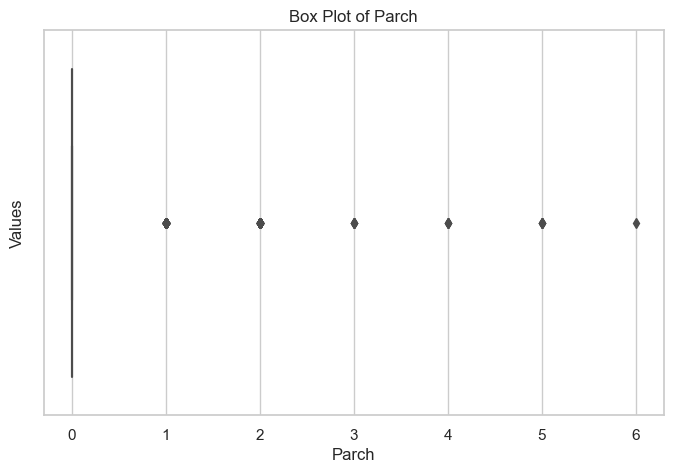

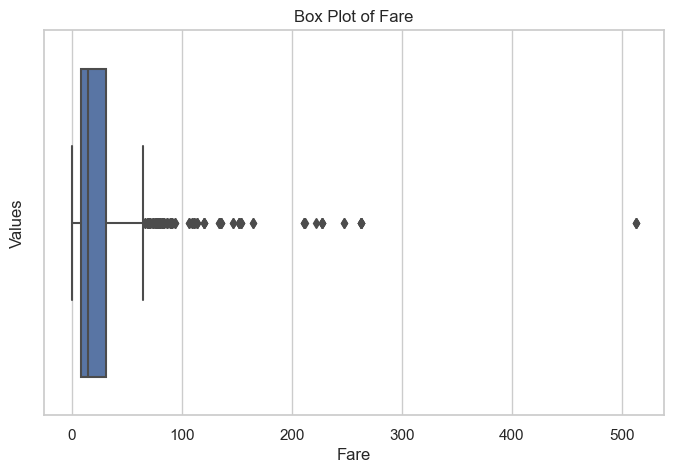

In [35]:
# Exclude the "Survived" and "Pclass" column
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(["Survived","Pclass"])

# Plot box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

Outliers are present in some columns, requiring appropriate techniques to handle them when building model.